<a href="https://colab.research.google.com/github/Teenu2105/DS-Lab-prgms/blob/main/AIML_M1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("stud_data.csv")

In [ ]:
# Look at first few rows
print(df.head())

       Name  Hours_Studied  Previous_Sem_Marks  Attendance  Phone_Usage_Hrs  \
0  Ishaan 1            8.0                85.0        78.0              6.0   
1  Aadhya 2            8.0                51.0        64.0              9.0   
2  Aadhya 3            6.0                73.0        46.0              8.0   
3  Aditya 4           11.0                70.0        83.0              8.0   
4     Ira 5            2.0               100.0        97.0              2.0   

   Current_Marks  Gender  
0             60  Female  
1             44       F  
2             51    Male  
3             74       M  
4             68       M  


In [ ]:
# Check info & missing values
print(df.info())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                105 non-null    object 
 1   Hours_Studied       103 non-null    float64
 2   Previous_Sem_Marks  104 non-null    float64
 3   Attendance          103 non-null    float64
 4   Phone_Usage_Hrs     103 non-null    float64
 5   Current_Marks       105 non-null    int64  
 6   Gender              105 non-null    object 
dtypes: float64(4), int64(1), object(2)
memory usage: 5.9+ KB
None
Name                  0
Hours_Studied         2
Previous_Sem_Marks    1
Attendance            2
Phone_Usage_Hrs       2
Current_Marks         0
Gender                0
dtype: int64


In [ ]:
# Remove duplicate rows
df = df.drop_duplicates()


In [ ]:
# Cap Attendance at 100
df['Attendance'] = df['Attendance'].clip(0, 100)

In [ ]:
# Step 5: Show basic statistics
print(df.describe())

       Hours_Studied  Previous_Sem_Marks  Attendance  Phone_Usage_Hrs  \
count     102.000000          103.000000  102.000000       102.000000   
mean        5.970588           64.844660   72.843137         4.656863   
std         3.343254           19.921295   18.677431         3.032808   
min         0.000000           30.000000   40.000000         0.000000   
25%         3.000000           49.000000   57.000000         2.000000   
50%         6.000000           66.000000   74.500000         5.000000   
75%         9.000000           80.500000   89.000000         7.000000   
max        11.000000          100.000000  100.000000         9.000000   

       Current_Marks  
count      104.00000  
mean        51.37500  
std         17.06651  
min         20.00000  
25%         38.00000  
50%         51.00000  
75%         64.00000  
max         90.00000  


In [ ]:
# Copy the dataframe to keep original safe
data = df.copy()

In [ ]:
# Convert columns to numeric (coerce errors to NaN)
cols_to_numeric = ['Hours_Studied', 'Previous_Sem_Marks', 'Attendance']
for col in cols_to_numeric:
    data[col] = pd.to_numeric(data[col], errors='coerce')

    # Remove negative values and impossible values
for col in ['Hours_Studied', 'Phone_Usage_Hrs',]:
    data.loc[data[col] < 0, col] = np.nan  # Replace negative values with NaN

In [ ]:
# Attendance and Previous_Sem_Percentage: should be within 0-100%
data.loc[(data['Attendance'] < 0) | (data['Attendance'] > 100), 'Attendance'] = np.nan
data.loc[(data['Previous_Sem_Marks'] < 0) | (data['Previous_Sem_Marks'] > 100), 'Previous_Sem_Marks'] = np.nan

In [ ]:
# Now check remaining missing values
print(data.isnull().sum())

Name                  0
Hours_Studied         2
Previous_Sem_Marks    1
Attendance            2
Phone_Usage_Hrs       2
Current_Marks         0
Gender                0
dtype: int64


In [ ]:
# Option 1: Drop rows with any missing values in features
cleaned_data = data.dropna(subset=cols_to_numeric)

# Optionally reset the index
cleaned_data = cleaned_data.reset_index(drop=True)

# Show result
print(cleaned_data.head())
print("Rows before cleaning:", len(data))
print("Rows after cleaning:", len(cleaned_data))

       Name  Hours_Studied  Previous_Sem_Marks  Attendance  Phone_Usage_Hrs  \
0  Ishaan 1            8.0                85.0        78.0              6.0   
1  Aadhya 2            8.0                51.0        64.0              9.0   
2  Aadhya 3            6.0                73.0        46.0              8.0   
3  Aditya 4           11.0                70.0        83.0              8.0   
4     Ira 5            2.0               100.0        97.0              2.0   

   Current_Marks  Gender  
0             60  Female  
1             44       F  
2             51    Male  
3             74       M  
4             68       M  
Rows before cleaning: 104
Rows after cleaning: 99


In [ ]:
# Remove negative values & out-of-range for each
for col in ['Hours_Studied', 'Phone_Usage_Hrs', ]:
    data.loc[data[col] < 0, col] = np.nan

data.loc[(data['Attendance'] < 0) | (data['Attendance'] > 100), 'Attendance'] = np.nan
data.loc[(data['Previous_Sem_Marks'] < 0) | (data['Previous_Sem_Marks'] > 100), 'Previous_Sem_Marks'] = np.nan

In [ ]:
# Impute missing values
for col in ['Hours_Studied', 'Phone_Usage_Hrs']:
    median_val = data[col].median()
    data[col] = data[col].fillna(median_val)

for col in ['Previous_Sem_Marks', 'Attendance']:
    mean_val = data[col].mean()
    data[col] = data[col].fillna(mean_val)

# Check if any missing values remain
print(data.isnull().sum())
print(data.head())

Name                  0
Hours_Studied         0
Previous_Sem_Marks    0
Attendance            0
Phone_Usage_Hrs       0
Current_Marks         0
Gender                0
dtype: int64
       Name  Hours_Studied  Previous_Sem_Marks  Attendance  Phone_Usage_Hrs  \
0  Ishaan 1            8.0                85.0        78.0              6.0   
1  Aadhya 2            8.0                51.0        64.0              9.0   
2  Aadhya 3            6.0                73.0        46.0              8.0   
3  Aditya 4           11.0                70.0        83.0              8.0   
4     Ira 5            2.0               100.0        97.0              2.0   

   Current_Marks  Gender  
0             60  Female  
1             44       F  
2             51    Male  
3             74       M  
4             68       M  


In [ ]:
# Create synthetic marks (target) using a weighted sum of features + random noise
np.random.seed(42)  # For reproducibility

data['Marks'] = (
    0.45 * data['Previous_Sem_Marks'] +    # up to 30 marks
    0.4 * (data['Hours_Studied'] / 10 * 100) + # scale study hours to 0–40 marks
    0.2 * data['Attendance'] -                 # up to 20 marks
    0.25 * data['Phone_Usage_Hrs'] +            # penalty for phone use
    np.random.normal(0, 5, len(data))          # noise
)


# Clamp marks to 0-100 for realism
data['Marks'] = data['Marks'].clip(0, 100)

# Show some examples
print(data[['Hours_Studied', 'Previous_Sem_Marks', 'Attendance', 'Phone_Usage_Hrs', 'Marks']].head())

   Hours_Studied  Previous_Sem_Marks  Attendance  Phone_Usage_Hrs      Marks
0            8.0                85.0        78.0              6.0  86.833571
1            8.0                51.0        64.0              9.0  64.808678
2            6.0                73.0        46.0              8.0  67.288443
3           11.0                70.0        83.0              8.0  97.715149
4            2.0               100.0        97.0              2.0  70.729233


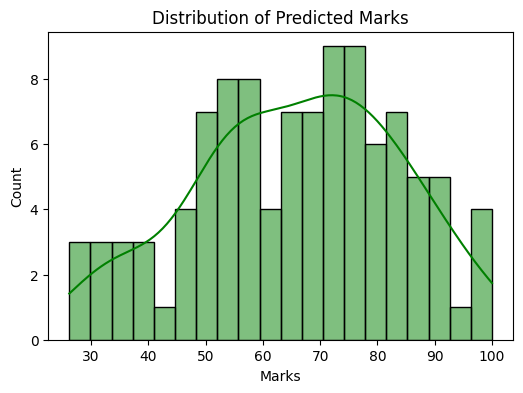

In [ ]:
# Distribution of Marks
plt.figure(figsize=(6,4))
sns.histplot(data['Marks'], bins=20, kde=True, color='green')
plt.title('Distribution of Predicted Marks')
plt.xlabel('Marks')
plt.ylabel('Count')
plt.show()

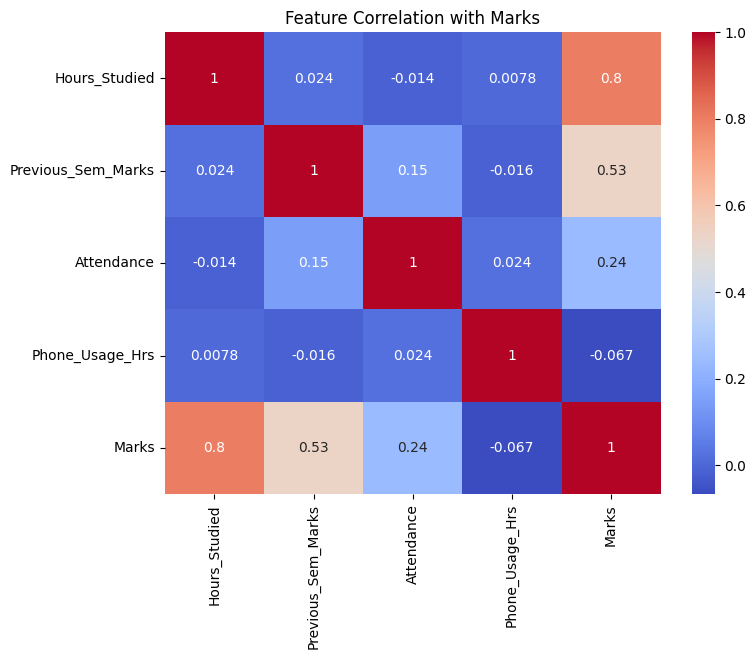

In [ ]:
# Correlation heatmap (including Marks)
corr = data[['Hours_Studied', 'Previous_Sem_Marks', 'Attendance', 'Phone_Usage_Hrs', 'Marks']].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Feature Correlation with Marks')
plt.show()

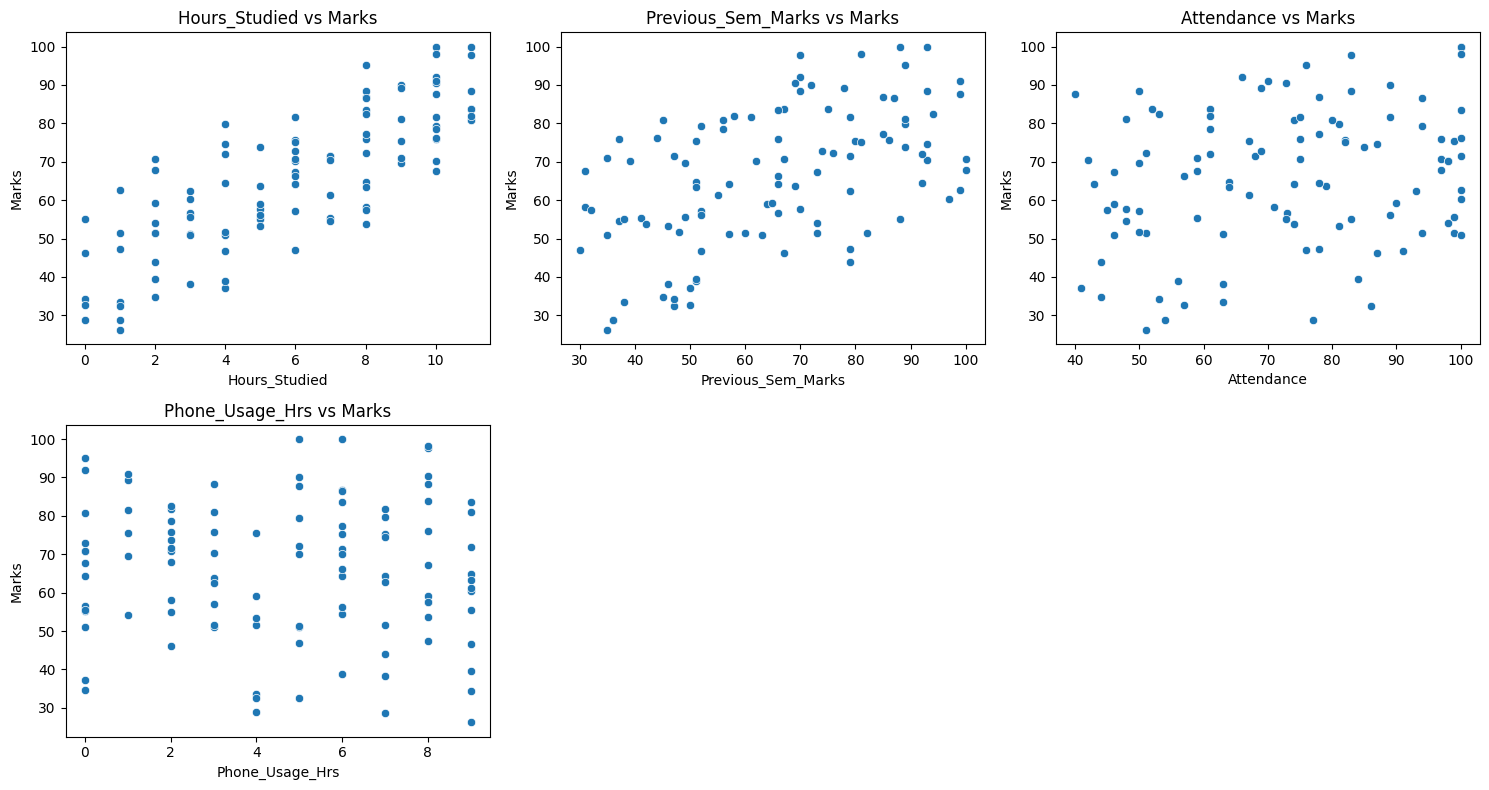

In [ ]:
# Scatter plots: Each feature vs Marks
features = ['Hours_Studied', 'Previous_Sem_Marks', 'Attendance', 'Phone_Usage_Hrs']
plt.figure(figsize=(15,8))
for i, col in enumerate(features):
    plt.subplot(2, 3, i+1)
    sns.scatterplot(x=data[col], y=data['Marks'])
    plt.title(f'{col} vs Marks')
plt.tight_layout()
plt.show()

RMSE: 4.73
MAE: 3.80
R²: 0.96


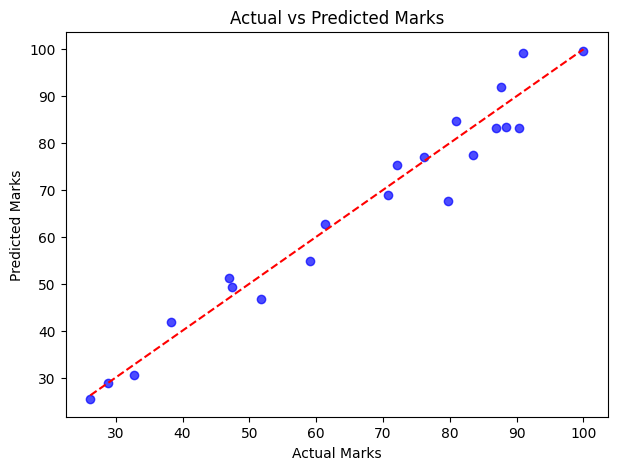

In [ ]:
# Features and target
features = ['Hours_Studied', 'Previous_Sem_Marks', 'Attendance',
            'Phone_Usage_Hrs']
X = data[features]
y = data['Marks']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)# Predict


rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R²: {r2:.2f}")

# Plot: Actual vs Predicted Marks
plt.figure(figsize=(7,5))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Marks')
plt.ylabel('Predicted Marks')
plt.title('Actual vs Predicted Marks')
plt.show()

In [ ]:
#Optional: Predict for a new student using user input


new_student = pd.DataFrame({
    'Hours_Studied': [float(input("Enter Hours Studied: "))],
    'Previous_Sem_Marks': [float(input("Enter Previous Sem Marks: "))],
    'Attendance': [float(input("Enter Attendance (%): "))],
    'Phone_Usage_Hrs': [float(input("Enter Phone Usage (hrs/day): "))]
})

# Assuming you have a trained model called `model`
predicted_marks = model.predict(new_student)
print("Predicted Marks:", round(predicted_marks[0], 2))